# Sediment Core Analysis

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

Read in Landes Core Data

In [101]:
df=pd.read_excel('core-data/Landes_STOTEN.xlsx',sheet_name='Core_XRF')

In [102]:
df.columns

Index(['core_id', 'sample_id_long', 'depth_cm_range', 'fine_coarse',
       'sampling_neigborhood', 'XRF_Pb_ppm', 'XRF_date', 'Nr_Runs', 'Pb',
       'Pb_sd', 'Pb_ins_e', 'Sn', 'Sn_sd', 'Sn_ins_e', 'Zn', 'Zn_sd',
       'Zn_ins_e', 'Cd', 'Cd_sd', 'Cd_ins_e', 'Unit'],
      dtype='object')

Delete unwanted data in depth column and replace with NaN

In [103]:
df = df.replace('PL_UG', np.nan)
df = df.replace('PL_UG2', np.nan)
df = df.replace('PL_UG3', np.nan)
df = df.replace("PL_UG (can't find) ", np.nan)

df = df.replace('NA', np.nan)

IMPORTANT
We do not have weights for these cores.   Franziska did not put it in the the data.  We are going to assume all samples are 20.0 grams.  

In [104]:
df['weight']=20.0

Convert Depth Range to a mean and save to a new column

In [110]:
df['depth_cm']=df['depth_cm_range'].str.split('_',expand=True)\
                                    .astype(float).mean(axis=1)

Just Save your core and the fine data to work with

In [106]:
core_id='18NYHC014'
fine_coarse='f'

df_fine=df[(df['core_id']==core_id) & (df['fine_coarse']==fine_coarse)]

Plot Lead

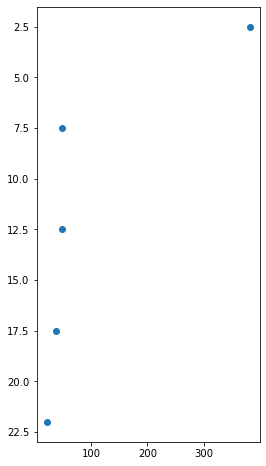

In [107]:
fig,ax=plt.subplots()
fig.set_size_inches(4,8)
ax.scatter(df_fine.Pb,df_fine.depth_cm)
ax.invert_yaxis()


### Calculating Inventory

In the handout I gave the formula for calculating inventory  but people are used to doing math in Pandas so here are some hints.

### I can sum one column like lead

In [86]:
df_fine['Pb'].sum()

538.33333337

### I can sum a column and divide by a number

In [87]:
df_fine['Pb'].sum()/1000

0.53833333337

### I can multiply two columns.  Here I will multiply depth and Pb

In [88]:
df_fine['Pb']*df_fine['depth_cm']

123    954.166667
125    367.500000
127    608.333333
129    665.000000
131    462.000000
dtype: float64

### I can mulitply and then sum!

In [89]:
(df_fine['Pb']*df_fine['depth_cm']).sum()

3057.000000125

### This is where you can use the function sum in two ways

In [90]:
np.sum(df_fine['Pb']*df_fine['depth_cm'])

3057.000000125

In [ ]:
df_fine['']

# You have everything you need to know to calculate an inventory.  It is easier than you think once you get your units in order!

The central park inventories average around 57 g/m2 from table 1.


Text(0.5, 0, 'Tin (mg/Kg)')

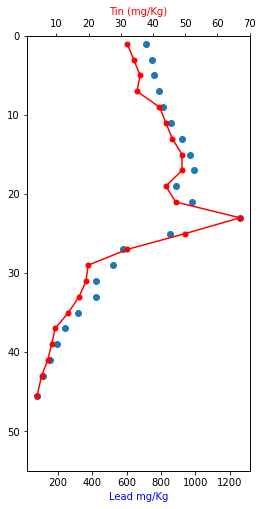

In [111]:
df=pd.read_excel('core-data/ChillrudTable2.xlsx')
fig,ax=plt.subplots()
fig.set_size_inches(4,8)
ax.scatter(df.Pb,df.Depth_cm)
ax.set_ylim([55,0])
ax.margins(.05)
ax.set_xlabel('Lead mg/Kg',color='blue')

# This gives you a second axis with a anice plot in just a couple lines.  
ax2=ax.twiny()
ax2.plot(df.Sn,df.Depth_cm,'.r-',markersize=10)
ax2.set_xlabel('Tin (mg/Kg)',color='r')

My notes for assigning cores

In [77]:
df_cores=pd.read_excel('core-data/Landes_STOTEN.xlsx',sheet_name='Core_XRF')

In [78]:
df_cores['core_id'].value_counts()

18UWHC004    24
18NYHC042    24
18NYHC038    23
18UWHC009    21
18UWHC014    20
18NYHC043    18
18UWHC018    18
18UWHC012    17
18NYHC020    17
18NYHC029    16
18NYHC041    16
18NYHC044    16
18UWHC011    16
18UWHC019    16
18UWHC015    16
18NYHC021    15
18NYHC045    15
18NYHC011    15
18UWHC010    14
18NYHC025    14
18NYHC034    14
18NYHC013    14
18NYHC008    14
18NYHC019    13
18NYHC057    12
18UWHC022    12
18NYHC009    12
18UWHC007    12
18UWHC017    12
18NYHC031    12
18NYHC012    12
18NYHC003    12
18NYHC026    12
18UWHC006    12
18NYHC005    12
18UWHC013    12
18NYHC015    12
18NYHC001    12
18NYHC033    12
18NYHC006    12
18UWHC001    12
18NYHC014    10
18UWHC020    10
18UWHC002    10
18NYHC024    10
18UWHC008    10
18UWHC003    10
18NYHC028     8
18UWHC016     8
Name: core_id, dtype: int64